In [57]:
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import patchify
import numpy as np
import matplotlib.gridspec as gridspec
import glob as glob
import os
import cv2
import random

STRIDE = 120
SHOW_PATCHES = True

In [58]:
def show_patches(patches):
    plt.figure(figsize=(patches.shape[0], patches.shape[1]))
    gs = gridspec.GridSpec(patches.shape[0], patches.shape[1])
    gs.update(wspace=0.01, hspace=0.02)
    counter = 0
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
            ax = plt.subplot(gs[counter])
            plt.imshow(patches[i, j, 0, :, :, :])
            plt.axis('off')
            counter += 1
    plt.show()

In [59]:
def create_patches(
    input_paths, out_hr_path, out_lr_path,
):
    os.makedirs(out_hr_path, exist_ok=True)
    os.makedirs(out_lr_path, exist_ok=True)
    all_paths = os.listdir(input_paths)
    # for input_path in input_paths:
    #     all_paths.extend(glob.glob(f"{input_path}/*"))
    print(f"Creating patches for {len(all_paths)} images")
    for image_name in tqdm(all_paths, total=len(all_paths)):
        upscale = random.randrange(1,10)*0.1
        image_path = os.path.join(input_paths+"/", image_name)
        # print(image_path)
        image = Image.open(image_path)
        image_name = image_name.replace(".png", "")
        w, h = image.size
        # if w < STRIDE or h < STRIDE:
        #     continue
        # Create patches of size (32, 32, 3)
        patches = patchify.patchify(np.array(image), (128, 128, 3), STRIDE)

        counter = 0
        for i in range(patches.shape[0]):
            for j in range(patches.shape[1]):
                counter += 1
                patch = patches[i, j, 0, :, :, :]
                patch = cv2.cvtColor(patch, cv2.COLOR_RGB2BGR)
                # print(f"{out_hr_path}/{image_name}_{counter}.png")
                cv2.imwrite(
                    f"{out_hr_path}/{image_name}_{counter}.png",
                    patch
                )

                h, w, _ = patch.shape
                low_res_img = cv2.resize(patch, (int(w*upscale), int(h*upscale)), 
                                        interpolation=cv2.INTER_CUBIC)

                high_res_upscale = cv2.resize(low_res_img, (w, h), 
                                            interpolation=cv2.INTER_CUBIC)
                cv2.imwrite(
                    f"{out_lr_path}/{image_name}_{counter}.png",
                    high_res_upscale
                )
    if SHOW_PATCHES:
        show_patches(patches)

Creating patches for 128 images


100%|██████████| 128/128 [00:28<00:00,  4.42it/s]


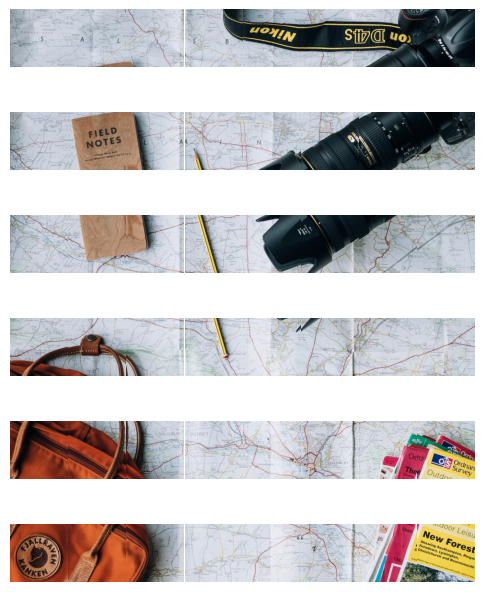

In [60]:
# input_paths = "/media/hero/Study/User/Study/data/upscale_image/T91"
# input_paths = "/media/hero/Study/User/Study/Pytorch/make_data/data_crawl"
input_paths = "/home/hero/Downloads/data_crawl"
out_hr_path = "/media/hero/Study/User/Study/data/upscale_image/t91_hr_patches"
out_lr_path = "/media/hero/Study/User/Study/data/upscale_image/t91_lr_patches"
create_patches(input_paths, out_hr_path, out_lr_path)

In [61]:
scale_factor = 0.1
os.makedirs('/media/hero/Study/User/Study/data/upscale_image/test_bicubic_rgb_xx', exist_ok=True)
os.makedirs('/media/hero/Study/User/Study/data/upscale_image/test_hr_xx', exist_ok=True)
save_path_lr = '/media/hero/Study/User/Study/data/upscale_image/test_bicubic_rgb_xx'
save_path_hr = '/media/hero/Study/User/Study/data/upscale_image/test_hr_xx'

In [62]:
input_paths_test = "/home/hero/Downloads/data_crawl"
for image_name in tqdm(os.listdir(input_paths_test), total=len(os.listdir(input_paths_test))):
    image_path = os.path.join(input_paths_test+"/", image_name)

    # orig_img = Image.open(image_path)
    orig_img = cv2.imread(image_path)
    # image_name = image_name.replace(".png", "")
    # print(type(orig_img))
    w, h = orig_img.shape[:2]
    # print(f"Original image dimensions: {w}, {h}")
    cv2.imwrite(f"{save_path_lr}/{image_name}",orig_img)

    low_res_img = cv2.resize(orig_img, (int(h*scale_factor), int(w*scale_factor)))
    high_res_upscale = cv2.resize(low_res_img, (h, w))
    
    cv2.imwrite(f"{save_path_hr}/{image_name}",high_res_upscale)

100%|██████████| 128/128 [00:08<00:00, 15.07it/s]
